In [5]:
# Import our dependencies
import pandas as pd
import os
from pathlib import Path
import csv
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#read the inpout file
input_file = input("Please enter the path and name of the file to be analyzed ? :")

file_check =  Path(input_file)
file_exists = file_check.exists()
print(file_exists)

Please enter the path and name of the file to be analyzed ? :/Users/pooja/Documents/ClassProject-/GSS.xls
True


In [7]:
GSS_df = pd.read_excel(input_file, encoding = "ISO-8859-1")
GSS_df.head()
#print(GSS_df.head())

list(GSS_df)




# get the data size
#data_set_size = file_one_df.shape
#print(data_set_size)

#get all column names to create the next data sets
#file_one_df.columns.values

['Ballot used for interview',
 'Specific denomination',
 'Rs religious preference',
 'Should marijuana be made legal',
 'Courts dealing with criminals',
 'Importance of gun control issue to r',
 'Caring for the poor -- version z',
 'Halting rising crime rate',
 'Think of self as liberal or conservative',
 'Vote obama or mccain',
 'Religion in which raised',
 'General happiness',
 'Opinion of family income',
 'Satisfaction with financial situation',
 'Job or housework',
 'Is r likely to lose job',
 'To be well liked or popular',
 'Confidence in press',
 'Confidence in education',
 'Condition of health',
 'Happiness of marriage',
 'Political party affiliation',
 'Respondents income',
 'Total family income',
 'Fathers census occupation code (2010)',
 'Ever been divorced or separated',
 'Age when first married',
 'Marital status',
 'Rs industry code   (1980)',
 'Travel time to work',
 'R self-emp or works for somebody',
 'Labor force status',
 'Respondent id number',
 'Number of brothers a

In [9]:
## Select the columns you want to analyze


ReducedGSS_df= GSS_df.filter(['Gss year for this respondent                       ','Labor force status','R self-emp or works for somebody'
                          ,'Marital status','Travel time to work','Total family income','Political party affiliation',
                         'General happiness','Happiness of marriage','Condition of health','Think of self as liberal or conservative',
                         'Religion in which raised','Satisfaction with financial situation','Job or housework','Number of brothers and sisters',
                        'Age of respondent','Race of respondent','Respondents sex','Type of college respondent attended','degree'],axis=1)
ReducedGSS_df.head()

,Gss year for this respondent,Labor force status,R self-emp or works for somebody,Marital status,Travel time to work,Total family income,Political party affiliation,General happiness,Happiness of marriage,Condition of health,Think of self as liberal or conservative,Religion in which raised,Satisfaction with financial situation,Job or housework,Number of brothers and sisters,Age of respondent,Race of respondent,Respondents sex,Type of college respondent attended
0,2006.0,Working fulltime,Someone else,Never married,Not applicable,$25000 or more,Strong democrat,Pretty happy,Not applicable,Fair,Extremely liberal,Catholic,More or less,Very satisfied,1,50,Black,Female,Not applicable
1,2006.0,Working fulltime,Someone else,Never married,Not applicable,$25000 or more,"Ind,near rep",Very happy,Not applicable,Not applicable,Slightly liberal,Catholic,More or less,Very satisfied,5,27,Other,Male,Not applicable
2,2006.0,Retired,Someone else,Divorced,Not applicable,Refused,Strong democrat,Pretty happy,Not applicable,Not applicable,Conservative,Catholic,Satisfied,Not applicable,10,67,White,Female,Not applicable
3,2006.0,Working parttime,Someone else,Never married,Not applicable,$25000 or more,Strong democrat,Very happy,Not applicable,Excellent,Slightly liberal,Protestant,More or less,Mod. satisfied,3,50,Black,Female,Not applicable
4,2006.0,School,Not applicable,Never married,Not applicable,Don't know,Strong democrat,Pretty happy,Not applicable,Good,Liberal,Catholic,Satisfied,Not applicable,4,20,Black,Male,Not applicable


In [10]:
#lets rename teh columns
ReducedGSS_df = ReducedGSS_df.rename(columns={'Gss year for this respondent                       ': 'Year',
                         'R self-emp or works for somebody' : 'Self_emp_status'})
                         
ReducedGSS_df.head

<bound method NDFrame.head of          Year Labor force status Self_emp_status Marital status  \
0      2006.0   Working fulltime    Someone else  Never married   
1      2006.0   Working fulltime    Someone else  Never married   
2      2006.0            Retired    Someone else       Divorced   
3      2006.0   Working parttime    Someone else  Never married   
4      2006.0             School  Not applicable  Never married   
5      2006.0   Working fulltime    Someone else        Married   
6      2006.0   Working fulltime    Someone else        Widowed   
7      2006.0   Unempl, laid off    Someone else  Never married   
8      2006.0   Working fulltime    Someone else  Never married   
9      2006.0   Working fulltime    Someone else  Never married   
10     2006.0            Retired    Someone else        Widowed   
11     2006.0              Other    Someone else  Never married   
12     2006.0             School   Self-employed  Never married   
13     2006.0   Working fulltime

In [11]:
Happiness 
# 1. Happiness ( Summarized Data) 1972 - 2016
2. Happiness vs Satisfaction financial 
3. Happiness vs Marital Status 
4. Happiness vs Labor Force Status 
5. Happiness vs Condition of health 
6. Happiness vs Social Issues (Marijuana , Political Affliation, Gun Issues)




SyntaxError: invalid syntax (<ipython-input-11-f88d4efcd7cf>, line 3)

In [12]:
csv_path = os.path.join('..','ClassProject-', 'Happiness1972-2016.csv')
Happiness_df = pd.read_csv(csv_path)



Happiness_df=Happiness_df.rename(columns={'Gss year for this respondent                       ': 'Year',
                         'General hapiness' : 'Happiness_Measure'})

Happiness_df.head()


,General happiness,Year
0,Not too happy,1972
1,Not too happy,1972
2,Pretty happy,1972
3,Not too happy,1972
4,Pretty happy,1972


In [41]:
# Summarize Happiness data over the years ( 1972 - 2016)

Happiness_Summary=Happiness_df.groupby(['General happiness','Year'], as_index=False).size().unstack(fill_value=0).reset_index()





Happiness_Summary= Happiness_Summary.drop('Data collection: General Social Survey\rCase Selection: all cases', 1)



Happiness_Summary=Happiness_Summary.drop(Happiness_Summary.index[[0,1,2,5]])

total = Happiness_Summary.apply(np.sum)
total['General happiness'] = 'total'
Happiness_Summary=Happiness_Summary.append(pd.DataFrame(total.values, index=total.keys()).T, ignore_index=True)

Happiness_Summary.set_index('General happiness', inplace=True)



for idx in Happiness_Summary.index:
    Happiness_Summary.loc[idx] = ((Happiness_Summary.loc[idx]/Happiness_Summary.loc['total']))*100

Happiness_Summary=Happiness_Summary.round(2)

Happiness_Summary 





Year,1972,1973,1974,1975,1976,1977,1978,1980,1982,1983,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
General happiness,,,,,,,,,,,,,,,,,,,,,
Not too happy,16.5006,13.0667,13.1081,13.064,12.5417,11.9188,9.55834,13.3379,14.5013,12.7781,...,12.1169,10.551,12.4178,13.463,13.061,15.6824,15.5468,14.1039,13.4783,15.8097
Pretty happy,53.2379,51.0667,48.9865,54.0741,53.3689,53.2417,56.0976,52.736,54.9326,56.0712,...,56.1297,57.7242,57.2681,55.1982,56.1286,54.5906,58.0677,55.7026,55.4545,55.9986
Very happy,30.2615,35.8667,37.9054,32.862,34.0894,34.8396,34.3441,33.9261,30.566,31.1507,...,31.7534,31.7249,30.3141,31.3388,30.8104,29.727,26.3855,30.1935,31.0672,28.1917
total,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


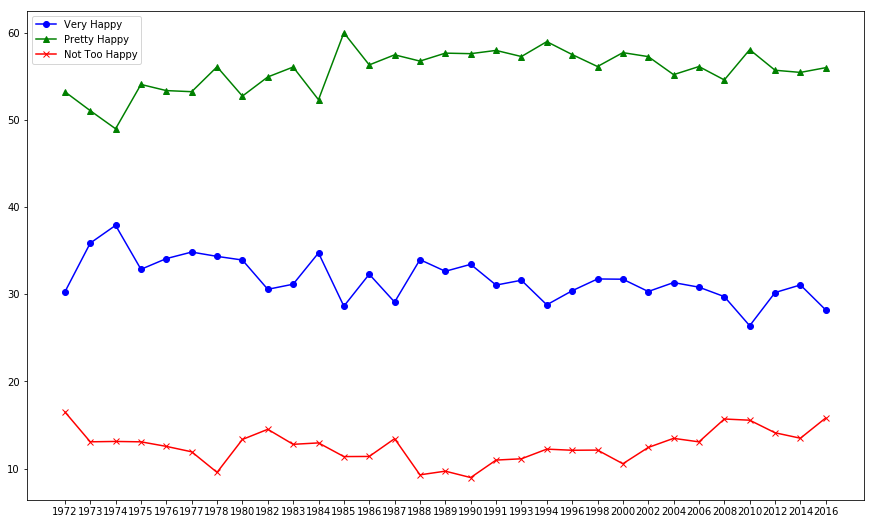

In [42]:
# Plot Data from 1972- 2016 (Happiness Measure )

x_axis=list(Happiness_Summary)
#print(x_axis)

#target=['Pretty happy','Not too happy','Very happy']


y_axis=list(Happiness_Summary.loc['Very happy'])
y_axis1=list(Happiness_Summary.loc['Pretty happy'])
y_axis2=list(Happiness_Summary.loc['Not too happy'])


fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

#print(y_axis)

#ax=plt.plot(x_axis,y_axis2,color='red')
#plt.plot(x_axis,y_axis,color='yellow')
#plt.plot(x_axis,y_axis1,color='green')

very_happy, = plt.plot(x_axis, y_axis, marker ='o', color='blue', label="Very Happy")
# Each point on the cosine chart is marked by a red triangle
pretty_happy, = plt.plot(x_axis, y_axis1, marker='^', color='green', label="Pretty Happy")

not_too_happy, = plt.plot(x_axis, y_axis2, marker='x', color='red', label="Not Too Happy")

plt.legend(handles=[very_happy, pretty_happy,not_too_happy], loc="best")


plt.show()









